In [0]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip -q household_power_consumption.zip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('household_power_consumption.txt',sep=';')

In [50]:
# Making Time Stamp as Index
df['TimeStamp'] = df['Date']+' '+df['Time']
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'],format = "%d/%m/%Y %H:%M:%S")
df.index = df['TimeStamp']
df.index.name = None
df = df.drop(['Date','Time','TimeStamp'],axis = 1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [51]:
#Convert the values present in string type to float64
df = df.convert_objects(convert_numeric=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [52]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [53]:
df = df.ffill()
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

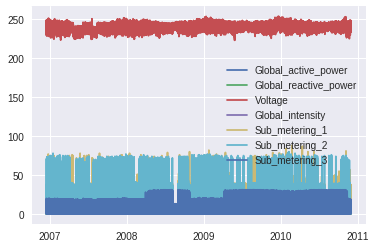

In [15]:
df.plot()

In [54]:
from pandas.tools.plotting import autocorrelation_plot
newdf = df
newdf = newdf.drop(['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)
newdf.head()

,Global_active_power
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


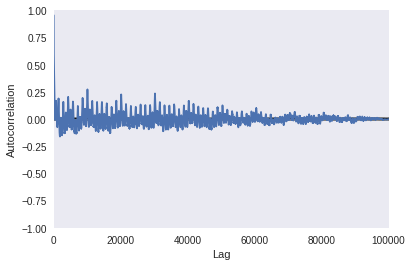

In [41]:
autocorrelation_plot(newdf[:100000])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


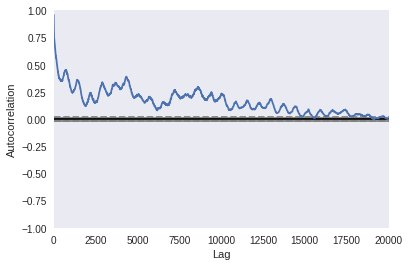

In [60]:
autocorrelation_plot(df[['Global_active_power','Global_intensity']][:20000])

In [63]:
newdf = newdf[:100000]
newdf.shape

(100000, 1)

In [65]:
newdf[70000:100000].shape

(30000, 1)

In [112]:
train = newdf[:70000]
test = newdf[70000:1000000]
print(train.shape)
print(test.shape)

(70000, 1)
(30000, 1)


In [67]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
model = ARIMA(train,order=(5,1,0))

In [72]:
model_fit = model.fit(disp = 0)

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [73]:
print(model_fit.summary())

                               ARIMA Model Results                               
Dep. Variable:     D.Global_active_power   No. Observations:                69999
Model:                    ARIMA(5, 1, 0)   Log Likelihood              -34692.744
Method:                          css-mle   S.D. of innovations              0.397
Date:                   Wed, 28 Mar 2018   AIC                          69399.487
Time:                           06:41:27   BIC                          69463.581
Sample:                       12-16-2006   HQIC                         69419.255
                            - 02-03-2007                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -3.373e-05      0.001     -0.040      0.968      -0.002       0.002
ar.L1.D.Global_active_power    -0.0581      0.004    -15

In [75]:
residuals = pd.DataFrame(model_fit.resid)

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


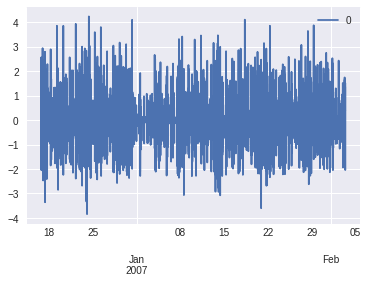

In [76]:
residuals.plot()

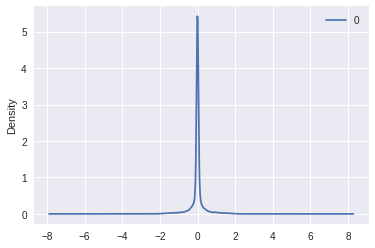

In [77]:
residuals.plot(kind='kde')

In [78]:
print(residuals.describe())

                  0
count  69999.000000
mean       0.000004
std        0.397205
min       -3.845973
25%       -0.030093
50%       -0.001252
75%        0.025593
max        4.238326


In [0]:
history = train

In [0]:
predictions = list()

In [132]:
X = df[['Global_active_power']][:1000].values
X.shape

(1000, 1)

In [0]:
size = int(len(X)*0.66)

In [0]:
train,test = X[0:size],X[size:len(X)]

In [138]:
history = [x for x in train]
len(history)

660

In [0]:
predictions = list()

In [0]:
for t in range(len(test)):
  model = ARIMA(history,order=(5,1,0))
  model_fit = model.fit(disp = 0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted = %f ,expected = %f'%(yhat,obs))

predicted = 2.414091 ,expected = 0.516000
predicted = 0.395558 ,expected = 2.426000
predicted = 2.213086 ,expected = 2.430000
predicted = 1.922695 ,expected = 2.424000
predicted = 2.306499 ,expected = 2.306000
predicted = 1.765363 ,expected = 0.288000
predicted = 0.764951 ,expected = 0.756000
predicted = 1.721624 ,expected = 3.498000
predicted = 3.382968 ,expected = 3.522000
predicted = 2.606750 ,expected = 3.460000
predicted = 2.323502 ,expected = 3.434000
predicted = 2.482224 ,expected = 1.646000
predicted = 1.988516 ,expected = 1.336000
predicted = 2.371270 ,expected = 2.874000
predicted = 3.348263 ,expected = 3.410000
predicted = 3.218508 ,expected = 3.412000
predicted = 2.732309 ,expected = 3.386000
predicted = 2.653640 ,expected = 1.844000
predicted = 1.969786 ,expected = 1.414000
predicted = 2.305229 ,expected = 3.352000
predicted = 3.692240 ,expected = 3.500000
predicted = 3.156483 ,expected = 3.516000
predicted = 2.915123 ,expected = 3.174000
predicted = 2.521654 ,expected = 1

predicted = 2.213468 ,expected = 2.332000
predicted = 1.791645 ,expected = 2.242000
predicted = 1.522323 ,expected = 0.224000
predicted = 0.437167 ,expected = 0.752000
predicted = 1.688638 ,expected = 2.330000
predicted = 2.449933 ,expected = 2.322000
predicted = 2.027848 ,expected = 2.312000
predicted = 1.624104 ,expected = 0.760000
predicted = 0.524972 ,expected = 0.364000
predicted = 1.211060 ,expected = 2.336000
predicted = 2.646324 ,expected = 2.312000
predicted = 1.986081 ,expected = 2.332000
predicted = 1.810225 ,expected = 0.856000
predicted = 0.497697 ,expected = 0.864000
predicted = 1.539991 ,expected = 2.302000
predicted = 2.489565 ,expected = 2.324000
predicted = 2.089027 ,expected = 1.852000
predicted = 1.476995 ,expected = 0.226000
predicted = 0.338050 ,expected = 2.184000
predicted = 2.643303 ,expected = 2.380000
predicted = 2.074295 ,expected = 1.920000
predicted = 1.803602 ,expected = 0.254000
predicted = 0.212746 ,expected = 2.164000
predicted = 2.540638 ,expected = 2

In [142]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test,predictions)
print(error)

0.6806499943395359


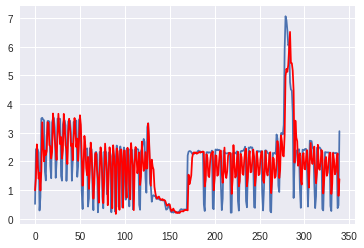

In [143]:
plt.plot(test)
plt.plot(predictions,color = 'red')
plt.show()